[   500000    360000    340000    472249    552312    190000    200000
    354289  58200000    338570    410000 111111112    476902    331464
    395685    550637    300000  61950000  77000000    550000    551750
  71033632  78802248  91066096    260000  71200000  60000000  65000000
  64000000  59325600  69818672  80777440    100000    301693  59024824
  61072000  56500000  56739064  71249624  95122496  70000000]
Число выбросов по методу z-отклонения: 52
Результирующее число записей: 30419


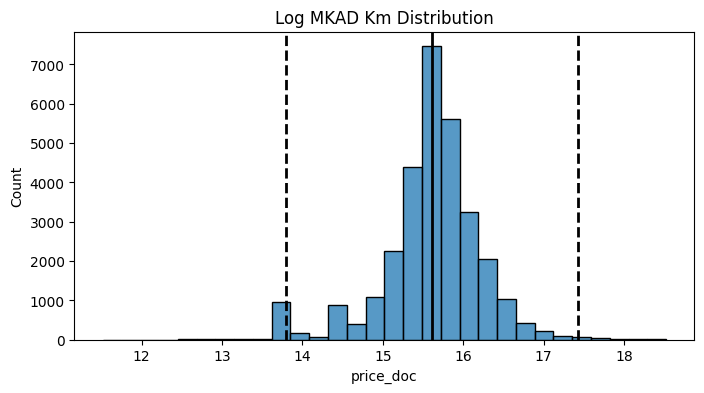

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data = pd.read_csv('sber_data.csv')
outliers = sber_data[sber_data['life_sq']>sber_data['full_sq']]
cleaned = sber_data.drop(outliers.index, axis =0)
# Это функция для поиска вбросов по методу сигм или Z отклонений. Ее результат используют для поиска некорректных данных
def outliers_z_score_mod(data, feature, left=3.7, right=3.7, log_scale=True):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
# это конец функции
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', log_scale=True)#ищем отклонения в таблице по расст от мкада
print(outliers['price_doc'].unique())
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
#Здесь строим график, чтобы увидеть смещение сигм и понять, насколько менять left right и нужно ли вообще
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');




